In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

donnees_vin_rouge = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

__<ins>Introduction</ins>__\
Dans le cadre d'un projet de classe nommé "No wine without water", nous avons eu à traiter une problématique en rapport avec la gestion de l'eau lors de la fabrication du vin.

Plus précisément, notre problématique est : "Quelle est la meilleure façon de lutter contre le manque d'eau potable nécessaire à la fabrication du vin rouge ?"

Afin de répondre à cette problématique, nous aurions aimé créer un système qui permettrait d'indiquer aux vignerons et viticulteurs la quantité d'eau optimale qu'ils doivent utiliser afin d'optimiser la croissance de leur vigne.

Ce que nous présentons est l'option qui se rapproche le plus d'une solution que nous pensons pouvoir apporter avec les moyens, faibles, qui sont à notre disposition. Nous n'encourageons pas l'utilisation de notre système étant donné que celui-ci n'est qu'un prototype.

__<ins>Les difficultés liées aux données.</ins>__\
Nous avons malheureusement été confrontées à une absence de données en libre accès concernant la quantité d'eau consommée et la quantité/qualité du vin produit.

Il a donc été décidé de revoir nos objectifs par rapport aux données à notre disposition :

1. Nous voulions créer un système se basant sur la quantité de vin produit, mais les seules données à disposition se basent sur la qualité du vin ;
2. Nous voulions des données qui mettent en rapport l'eau et le vin, mais l'absence de données nous a obligées à nous baser sur une autre métrique qui, elle-même, dépend de l'eau, la quantité de sucre présente dans le vin en termes de grammes par décimètre cube.

Il a donc été décidé de créer un système qui permettrait d'indiquer aux vignerons et viticulteurs la quantité de sucre souhaitable dans leur vin par rapport à diverses métriques afin d'avoir un vin de la qualité souhaitée. Avec ces résultats, ils devront déterminer la quantité d'eau pour leurs cultures avec leur propre système.

__<ins>Présentation des données utilisées.</ins>__\
Les données, et leurs échelles, utilisées pour la résolution de la problématique sont :\
1 - acidité fixe (acide tartrique - g / dm³)\
2 - acidité volatile (acide acétique - g / dm³)\
3 - acide citrique (g / dm³)\
4 - sucre résiduel (g / dm³)\
5 - chlorures (chlorure de sodium - g / dm³)\
6 - dioxyde de soufre libre (mg / dm³)\
7 - dioxyde de soufre total (mg / dm³)\
8 - densité (g / cm³)\
9 - pH\
10 - sulfates (sulfate de potassium - g / dm³)\
11 - alcool (% en volume)\
12 - qualité (note entre 0 et 10)\

Voici un échantillon des données utilisées :

In [6]:
print(donnees_vin_rouge)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

__<ins>Le choix de la quantité de sucre comme référence.</ins>__\
En l'absence de données en rapport avec l'eau, nous devions nous baser sur une autre métrique ayant un lien avec celle-ci.

Après nos recherches documentaires, nous avons conclu que la quantité de sucre dans le vin pourrait être un indicateur de la quantité d'eau utilisée lors de la culture des vignes.

Du point de vue chimique, il semblerait également que l'eau joue un rôle lors de la création de la sève élaborée (celle contenant le sucre) lors de la photosynthèse (cf cycle de Calvin).

Plus précisément, pour la création d'un composé de glyceraldehyde 3-phosphate qui permet, grâce à l'aide de l'aldolase, de créer un composé de glucose-6-phosphate (la molécule de "sucre" absorbée par les cellules de la vigne), il faut :

$$3 CO_2 + 6 NADPH + 6 H+ + 9 ATP + 5 H_2O\textrm{(l'eau)}$$

Ce qui donne :
$$\textrm{glyceraldehyde-3-phosphate (G3P)} + 6 NADP+ + 9 ADP + 8 P_i $$

Nous tenons cependant à rappeler que, comme vu précédemment, l'eau est un paramètre qui peut avoir une influence sur la quantité de sucre, mais elle est loin d'être le seul facteur.

__<ins>Présentation des différents modèles d'apprentissage.</ins>__\
Notre système comporte deux variantes :

1. Une basée sur une forêt d'arbres décisionnels.
2. Une basée sur un réseau de neurones.

Quelle que soit sa variante, notre système prend les mêmes types de données en entrée et renvoie la même sortie, c'est-à-dire la quantité de sucre.

Voici une représentation graphique de notre système :

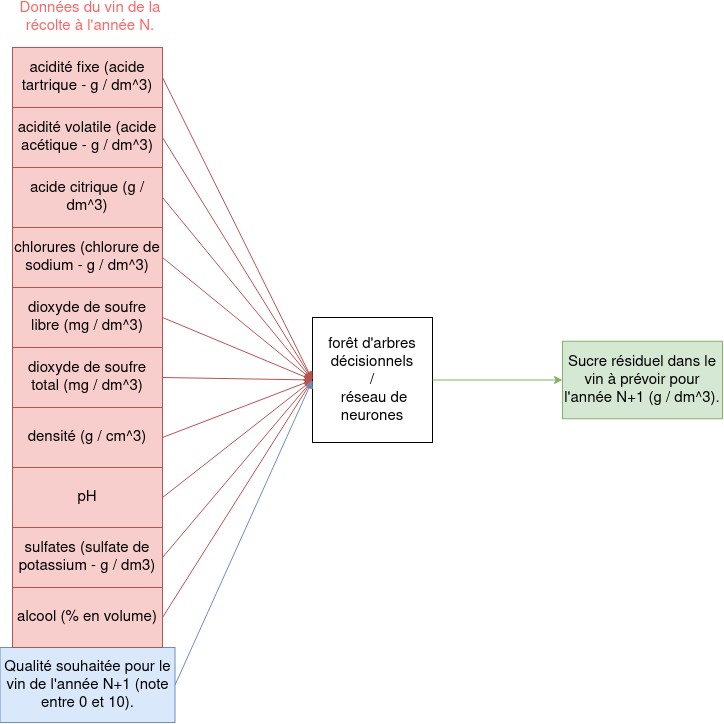

L'absence de données en libre accès limite notre capacité à faire mieux. Cependant, si les viticulteurs ou vignerons en ont les moyens, ils peuvent créer un système personnalisé qui leur permettra de déterminer la quantité d'eau souhaitable pour atteindre la quantité de sucre prévue :

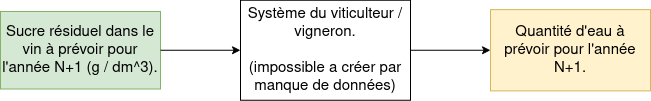

__<ins>Entrainement des différents modèles d'apprentissage.</ins>__

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

# Définition de la donnée à prédire
y = donnees_vin_rouge["residual sugar"]

# Définition des données à partir des quels faire les prédictions
entres = ["fixed acidity", "volatile acidity", "citric acid", 
          "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
          "density", "pH", "sulphates", "alcohol", "quality"]
X = donnees_vin_rouge[entres]

# Division de l'enselmbe des données en deux groupes, 
# l'un des deux sert à l'entrainement du model et l'autre pour validation sont éfficacité.
entrainement_X, validation_X, entrainement_y, validation_y = train_test_split(X, y, random_state = 0)

Entrainement de la forêt d'arbres décisionnels :

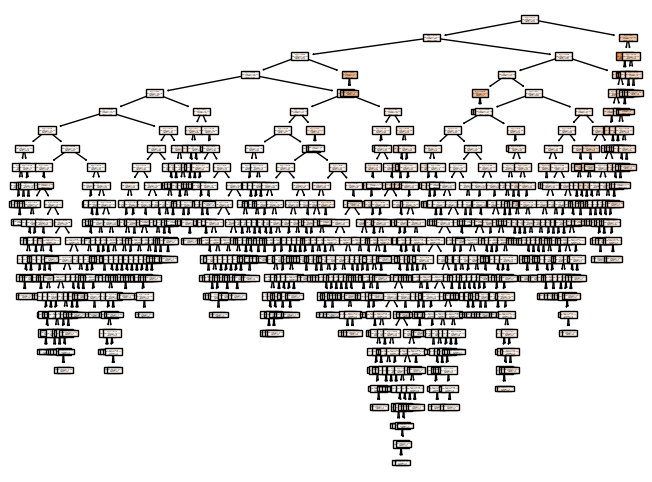

MAE: 0.5078281250000001


In [10]:
model_prediction_sucre = RandomForestRegressor(random_state=0)

# entrainement du model
model_prediction_sucre.fit(entrainement_X, entrainement_y)

# visualisation
plt.figure(figsize=(8, 6))
plot_tree(model_prediction_sucre.estimators_[0], filled=True)
plt.show()

# propagation des données de validation pour recevoir les prédictions du réseau
prediction_validation = model_prediction_sucre.predict(validation_X)

# vérification de l'éficacité du model en comparent ce qu'il prédit (prediction_validation) 
# à ce qu'il aurait dû prédire (validation_y)
model_validation_sucre = mean_absolute_error(prediction_validation, validation_y)

print("MAE: {}".format(model_validation_sucre))

Entrainement du réseau de neurones :

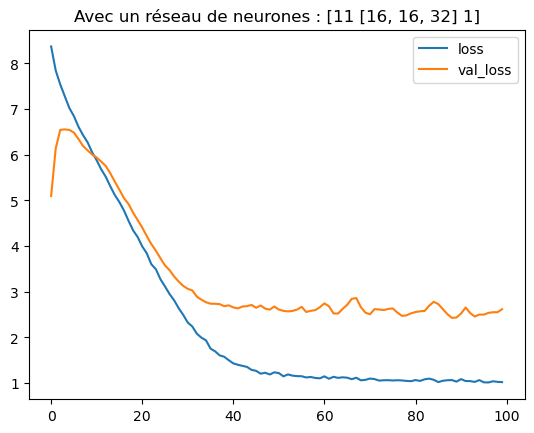

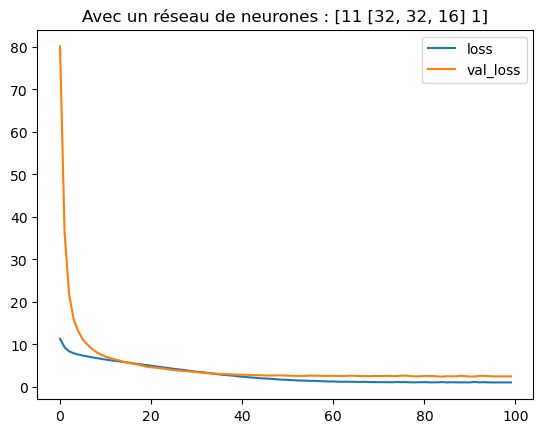

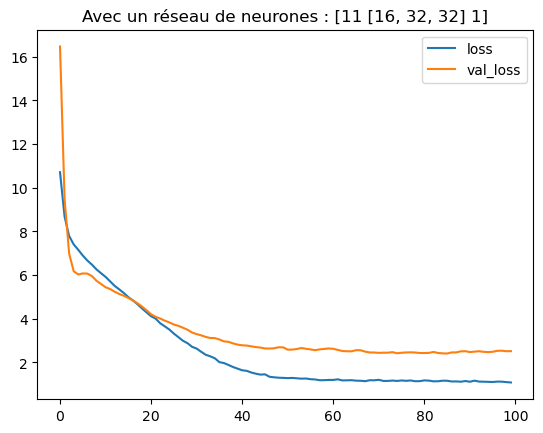

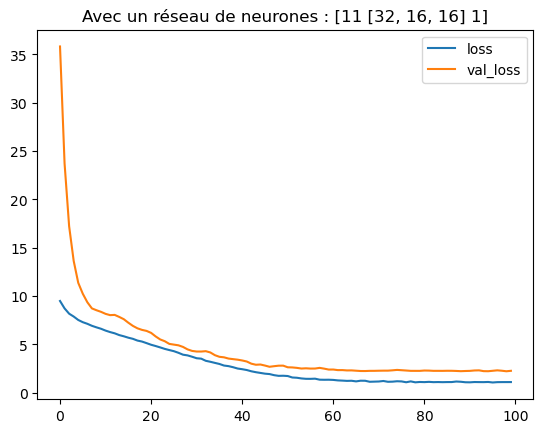

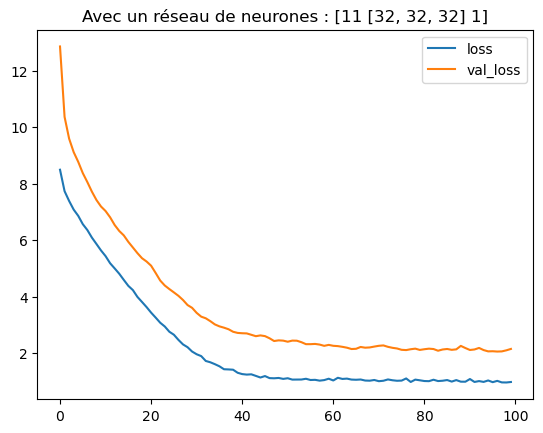

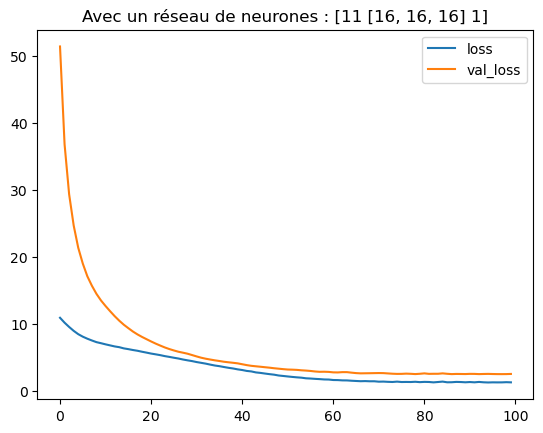

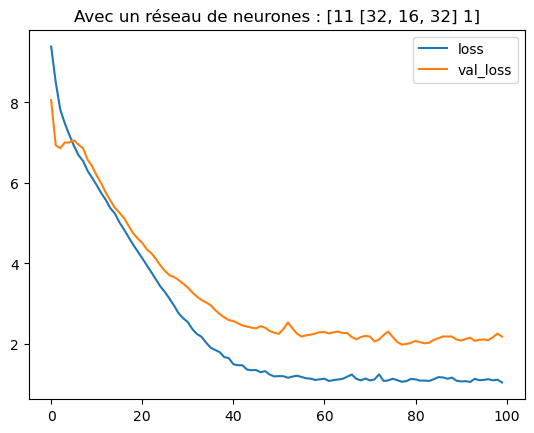

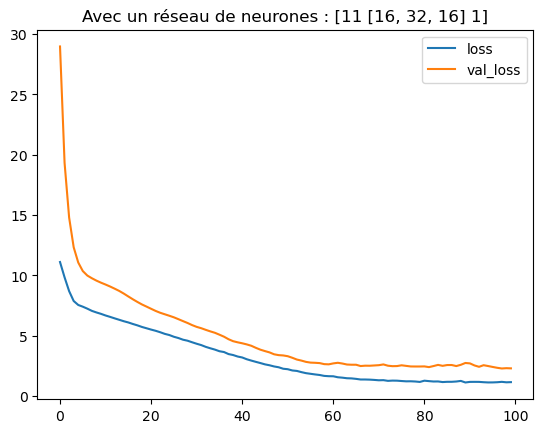

In [9]:
donnees_vin_rouge = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Définition des donnés servent à entrainer le model.
donnees_entrainement = donnees_vin_rouge.sample(frac=0.7, random_state=0)
entrainement_X = donnees_entrainement.drop('residual sugar', axis=1)
entrainement_y = donnees_entrainement['residual sugar']

# Définition des données servent à valider la qualité du model.
donnees_validation = donnees_vin_rouge.drop(donnees_entrainement.index)
validation_X = donnees_validation.drop('residual sugar', axis=1)
validation_y = donnees_validation['residual sugar']

############ Fonction d'entrainement pour tester plusieurs modèles ##############################
def test_entrainement_reseau(nb_couches_cachee):
    
    model_prediction_sucre = Sequential()
    
    model_prediction_sucre.add(Dense(nb_couches_cachee[0], activation='relu', input_shape=(11,)))
    model_prediction_sucre.add(BatchNormalization())
    # La normalisation sert à metre à la même echelle les données.
    
    for i in range(len(nb_couches_cachee) - 1) :
        model_prediction_sucre.add(BatchNormalization())
        model_prediction_sucre.add(Dense(nb_couches_cachee[i + 1], activation='relu'))
        
    model_prediction_sucre.add(BatchNormalization())
    # La normalisation sert à metre à la même echelle les données.
    model_prediction_sucre.add(Dense(1))

    model_prediction_sucre.compile(optimizer='adam', loss='mean_squared_error')

    entrainement = model_prediction_sucre.fit(
        entrainement_X, entrainement_y,
        validation_data=(validation_X, validation_y),
        batch_size=256,
        epochs=100,
        verbose=0,
    )

    resultats = pd.DataFrame(entrainement.history)
    resultats = resultats.loc[:, ['loss', 'val_loss']].plot()
    resultats.set_title(f'Avec un réseau de neurones : [11 {nb_couches_cachee} 1]')
    plt.show()
#################################################################

liste_resaux = [    
    [16, 16, 32], [32, 32, 16],
    [16, 32, 32], [32, 16, 16],
    [32, 32, 32], [16, 16, 16],
    
    [32, 16, 32], [16, 32, 16],
]

for i in liste_resaux :
    test_entrainement_reseau(i)

__<ins>Documentations</ins>__\
Présentation des données :
1. https://rpubs.com/Daria/57835test

Relation entre l'eau et le sucre :
1. https://paca.chambres-agriculture.fr/fileadmin/user_upload/Provence-Alpes-Cote_d_Azur/020_Inst_Paca/CA83/Documents/Agriculteurs/prestations_vignerons/plaquette_irrigation_viticulture_chambre_agricuture_var.pdf

2. https://ives-technicalreviews.eu/article/view/4029

3. https://oeno-one.eu/article/view/798#

4. https://fr.wikipedia.org/wiki/Cycle_de_Calvin

Nutrition des plantes avec les sèves élaborées et brutes :
1. https://fr.wikipedia.org/wiki/S%C3%A8ve_%C3%A9labor%C3%A9e

2. https://fr.wikipedia.org/wiki/S%C3%A8ve_brute

3. https://fr.wikipedia.org/wiki/Photosynth%C3%A8se

Aspect chimique :

1. https://en.wikipedia.org/wiki/Calvin_cycle

2. https://en.wikipedia.org/wiki/Glyceraldehyde_3-phosphate

3. https://fr.wikipedia.org/wiki/Fructose-1,6-bisphosphate